## Praca domowa 4

#### Autor: Zuzanna Kotlińska

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

#### a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie

In [52]:
df.loc[((df.Year > 2015.0) & (df.Publisher == "Nintendo") & (df.NA_Sales < df.EU_Sales)), ["Name"]].reset_index(drop = True)

,Name
0,Mario & Sonic at the Rio 2016 Olympic Games
1,Mario & Sonic at the Rio 2016 Olympic Games
2,Teddy Together


#### b) Jaki rodzaj gry zarobił najwięcej w 2010 roku?

In [34]:
df.loc[(df.Year == 2010.0)].groupby("Genre")["Global_Sales"].sum().reset_index().sort_values(ascending = False, 
                                                                                             by = "Global_Sales").head(1)

,Genre,Global_Sales
0,Action,117.64


#### c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia.

In [51]:
df1 = df[["Genre", "JP_Sales", "EU_Sales"]].groupby("Genre").mean().reset_index()
df1 = df1.loc[df1.JP_Sales > df1.EU_Sales, ["Genre", "JP_Sales"]].sort_values(ascending = False, by = "JP_Sales").rename(
columns = {'JP_Sales' : 'Średnia sprzedaż w Japonii', 'Genre' : 'Typ Gry'})
df1.reset_index(drop = True)

,Typ Gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

### Oryginalny wykres

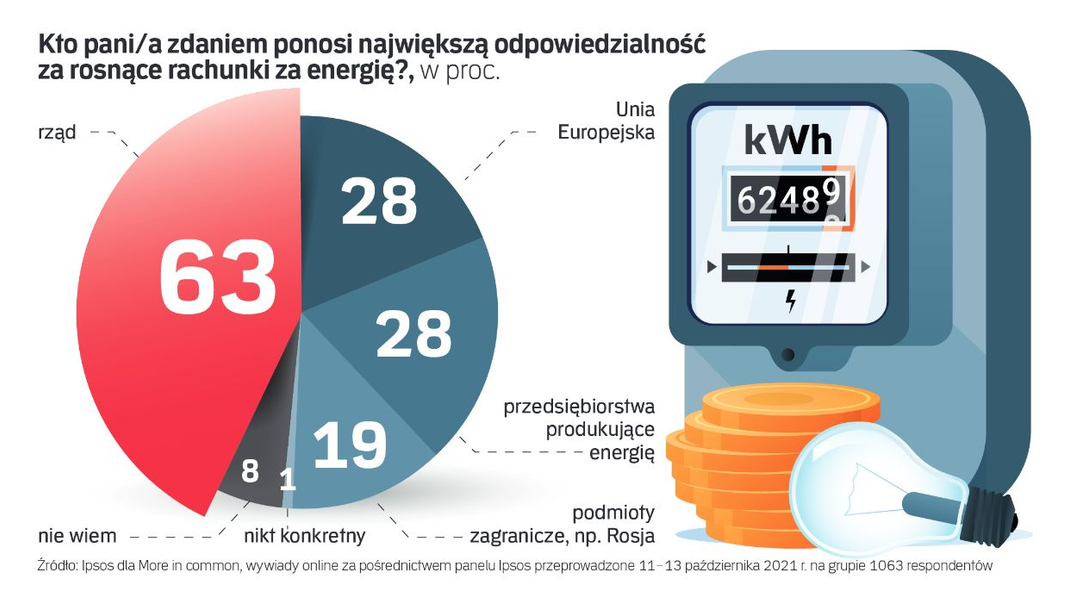

### Źródło:
<https://www.rp.pl/spoleczenstwo/art19026351-sondaz-polacy-stawiaja-na-oze-wina-za-rosnace-ceny-energii-obarczaja-rzad>

### Wykres w ggplot2

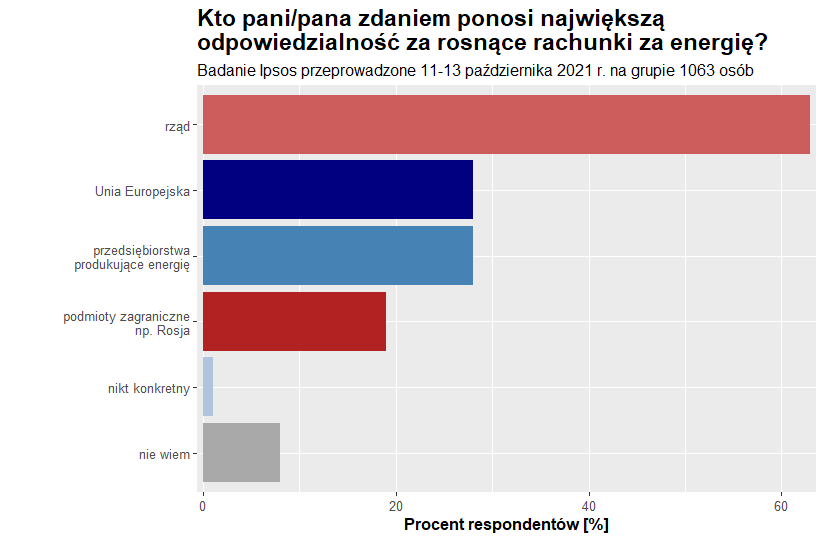

### Link do pracy domowej:
https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/a19bfa30e5508ca306c6bfd724b1f883ae93c5e1/homeworks/hw2/KotlinskaZuzanna/Kotlinska_Zuzanna_pd2.pdf

### Poprawiony wykres w Pythonie

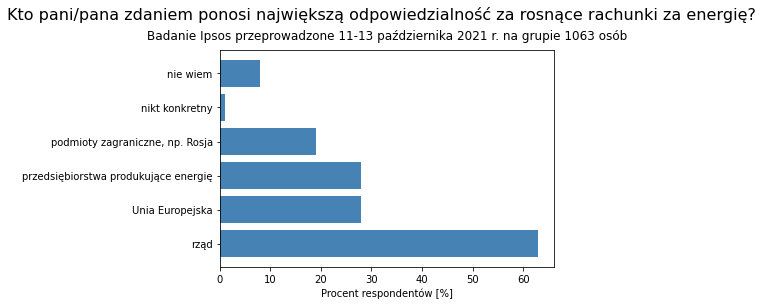

In [79]:
import matplotlib.pyplot as plt
names = ['rząd', 'Unia Europejska', 'przedsiębiorstwa produkujące energię', 'podmioty zagraniczne, np. Rosja', 
         'nikt konkretny', 'nie wiem']
values = [63, 28, 28, 19, 1, 8]
plt.barh(names, values, color = "steelblue")
plt.xlabel("Procent respondentów [%]")
plt.suptitle("Kto pani/pana zdaniem ponosi największą odpowiedzialność za rosnące rachunki za energię?", 
             y=1.03, fontsize=16)
plt.title("Badanie Ipsos przeprowadzone 11-13 października 2021 r. na grupie 1063 osób", y = 1.02, fontsize=12)
plt.show()

### Uzasadnienie
Wykres zrobiony w Pytonie za pomocą biblioteki matplotlib jest lepszy od dwóch pozostałych, głównie z uwagi na to, że tym razem zrobiłam słupki w jednym kolorze, dzięki czemu całość jest bardziej spójna i czytelna. Słupki zaczynają się też od razu w zerze i nie trzeba tego ręcznie poprawiać tak jak w pakiecie ggplot2. Tytuł i podtytuł zostały automatycznie wyśrodkowane. Mimo wszystko, przyjemniejsza jest dla mnie praca z pakietem ggplot2, mam wrażenie, że oferuje on więcej funkcji, a wykresy w nim zrobione wyglądają profesjonalniej.